In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:
lr = 5.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, weight decay {wd}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 5e-05, weight decay 0.1


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.7030	Val Loss:	0.5707	Accuracy:	0.7418	F1:	0.4495
2 / 30: Train Loss:	0.5318	Val Loss:	0.5199	Accuracy:	0.7724	F1:	0.5614
3 / 30: Train Loss:	0.4902	Val Loss:	0.5102	Accuracy:	0.7812	F1:	0.5831
4 / 30: Train Loss:	0.4595	Val Loss:	0.4544	Accuracy:	0.8053	F1:	0.6677
5 / 30: Train Loss:	0.4118	Val Loss:	0.4527	Accuracy:	0.8031	F1:	0.6748
6 / 30: Train Loss:	0.3972	Val Loss:	0.4224	Accuracy:	0.8271	F1:	0.7406
7 / 30: Train Loss:	0.3486	Val Loss:	0.4318	Accuracy:	0.8053	F1:	0.7506
8 / 30: Train Loss:	0.3122	Val Loss:	0.4112	Accuracy:	0.8206	F1:	0.7618
9 / 30: Train Loss:	0.2552	Val Loss:	0.5557	Accuracy:	0.7702	F1:	0.7302
10 / 30: Train Loss:	0.2074	Val Loss:	0.6545	Accuracy:	0.7199	F1:	0.6904
11 / 30: Train Loss:	0.1582	Val Loss:	0.5513	Accuracy:	0.8096	F1:	0.7587
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.67      0.62      0.64       119
      str

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.7030	Val Loss:	0.5708	Accuracy:	0.7418	F1:	0.4495
2 / 30: Train Loss:	0.5318	Val Loss:	0.5200	Accuracy:	0.7724	F1:	0.5614
3 / 30: Train Loss:	0.4904	Val Loss:	0.5094	Accuracy:	0.7834	F1:	0.5896
4 / 30: Train Loss:	0.4597	Val Loss:	0.4538	Accuracy:	0.8074	F1:	0.6730
5 / 30: Train Loss:	0.4117	Val Loss:	0.4567	Accuracy:	0.8053	F1:	0.6770
6 / 30: Train Loss:	0.3970	Val Loss:	0.4250	Accuracy:	0.8228	F1:	0.7319
7 / 30: Train Loss:	0.3497	Val Loss:	0.4272	Accuracy:	0.8053	F1:	0.7479
8 / 30: Train Loss:	0.3115	Val Loss:	0.4063	Accuracy:	0.8271	F1:	0.7643
9 / 30: Train Loss:	0.2559	Val Loss:	0.5512	Accuracy:	0.7659	F1:	0.7251
10 / 30: Train Loss:	0.2083	Val Loss:	0.6658	Accuracy:	0.7221	F1:	0.6951
11 / 30: Train Loss:	0.1530	Val Loss:	0.5513	Accuracy:	0.8381	F1:	0.7757
12 / 30: Train Loss:	0.1232	Val Loss:	0.6041	Accuracy:	0.8293	F1:	0.7772
13 / 30: Train Loss:	0.1172	Val Loss:	0.5952	Accuracy:	0.8359	F1:	0.7815
14 / 30: Train Loss:	0.0671	Val Loss:	1.2821	Accuracy:	0.787

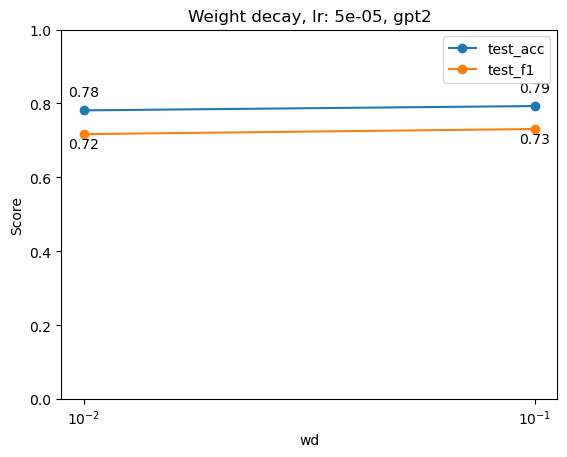

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr}, {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f